<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/Brain_tumor_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flower recognition using Keras and VGG16 model. More information on the link
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model
from keras.engine.input_layer import Input
from keras.applications.vgg16 import VGG16
import itertools  
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [5]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '../input/flowers/flowers'

In [6]:
# Image generators and augmentations and class list
target_names = [ 'Glioma',
           'Meningioma',
           'Pituitary tumor',]
image_height = 224
image_width  = 224
batch_size = 128
train_datagen = ImageDataGenerator(
        rescale=1./255.,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Lec/Train',
        target_size=(image_height, image_width),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'training',
        shuffle=False)
valid_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Lec/Val',
        target_size=(image_height, image_width),
        color_mode="rgb",
        batch_size=batch_size,
        subset = 'validation',
        class_mode='categorical',
        shuffle=False)
# Function to get labels from generators to separate them
def get_labels(gen):
    labels = []
    sample_no = len(gen.filenames)
    call_no = int(math.ceil(sample_no / batch_size))
    for i in range(call_no):
        labels.extend(np.array(gen[i][1]))
    
    return np.array(labels)

Found 1965 images belonging to 3 classes.
Found 122 images belonging to 3 classes.


In [7]:
input_tensor = Input(shape=(224,224,3))
base_model = VGG16(weights='imagenet', include_top=False,input_tensor = input_tensor)

58900480/58889256 [==============================] - 0s 0us/step


In [10]:
train_data = np.array(base_model.predict(train_generator))
train_labels = get_labels(train_generator)
valid_data = np.array(base_model.predict(valid_generator))
valid_labels = get_labels(valid_generator)

In [12]:
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels,
          epochs=25,
          batch_size=32,
          validation_data=(valid_data, valid_labels),
          verbose = 0)

In [13]:
#https://scikit-learn.org/stable/auto_examples/model_selection/
#plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [14]:
model = Model(inputs=base_model.input, outputs= model(base_model.output))
#model = Model(input= base_model.input, output= model(base_model.output))
Y_pred = model.predict_generator(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion matrix, without normalization
[[48  9  0]
 [13 14  1]
 [ 2  7 28]]
Normalized confusion matrix
[[0.84 0.16 0.  ]
 [0.46 0.5  0.04]
 [0.05 0.19 0.76]]


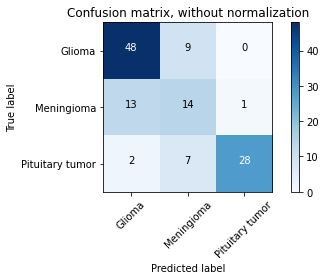

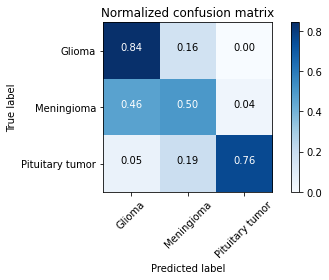

In [15]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(valid_generator.classes, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [16]:
CLASSES = [ 'Glioma',
           'Meningioma',
           'Pituitary tumor',
            ]

In [17]:
print('Classification Report')
# target_names = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9']
class_rep_cn = classification_report(valid_generator.classes, y_pred, target_names=CLASSES)
print(class_rep_cn)

Classification Report
                 precision    recall  f1-score   support

         Glioma       0.76      0.84      0.80        57
     Meningioma       0.47      0.50      0.48        28
Pituitary tumor       0.97      0.76      0.85        37

       accuracy                           0.74       122
      macro avg       0.73      0.70      0.71       122
   weighted avg       0.76      0.74      0.74       122

